In [6]:
pip install numpy pandas matplotlib scikit-learn seaborn imbalanced-learn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 258.3/258.3 kB 1.6 MB/s eta 0:00:00a 0:00:01
Note: you may need to restart the kernel to use updated packages.


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score, confusion_matrix, classification_report, log_loss, precision_score, recall_score, f1_score
import seaborn as sns
from imblearn.over_sampling import SMOTE
from sklearn.datasets import make_classification

from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [2]:
df = pd.read_csv('House-Prices-Advanced-Regression.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [3]:
# mencari missing value
print(df.isna().sum())

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64


In [4]:
frequencies = {}
# for column in df.columns:
#     frequencies[column] = df[column].value_counts().sort_values(ascending = False)
# frequencies

for column in df[['SalePrice', 'YrSold']]:
    frequencies[column] = df[column].value_counts().sort_values(ascending = False)
frequencies

{'SalePrice': SalePrice
 140000    20
 135000    17
 155000    14
 145000    14
 190000    13
           ..
 83500      1
 252000     1
 92900      1
 176432     1
 147500     1
 Name: count, Length: 663, dtype: int64,
 'YrSold': YrSold
 2009    338
 2007    329
 2006    314
 2008    304
 2010    175
 Name: count, dtype: int64}

In [5]:
# Mengisi nilai yang hilang
isi_mv = df['LotFrontage'].fillna(df['LotFrontage'].mean(), inplace = False)
isi_mv = df['LotFrontage'].fillna(df['LotFrontage'].median(), inplace = False)
isi_mv = df['LotFrontage'].fillna(df['LotFrontage'].mode()[0], inplace = False)
print('jumlah nilai kosong LotFrontage:', isi_mv.isna().sum(), '\n')

jumlah nilai kosong LotFrontage: 0 



In [6]:
# Mencari duplikat data
# duplikat = df.duplicated()
# print("Baris duplikat:\n", duplikat)
duplikat = df.duplicated()[df.duplicated() == True]
print("Baris duplikat:\n", duplikat)

Baris duplikat:
 Series([], dtype: bool)


In [7]:
# Menghapus duplikat data
hapus_duplikat = df.drop_duplicates()
print("DataFrame setelah menghapus duplikat:\n", hapus_duplikat)

DataFrame setelah menghapus duplikat:
         Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0        1          60       RL         65.0     8450   Pave   NaN      Reg   
1        2          20       RL         80.0     9600   Pave   NaN      Reg   
2        3          60       RL         68.0    11250   Pave   NaN      IR1   
3        4          70       RL         60.0     9550   Pave   NaN      IR1   
4        5          60       RL         84.0    14260   Pave   NaN      IR1   
...    ...         ...      ...          ...      ...    ...   ...      ...   
1455  1456          60       RL         62.0     7917   Pave   NaN      Reg   
1456  1457          20       RL         85.0    13175   Pave   NaN      Reg   
1457  1458          70       RL         66.0     9042   Pave   NaN      Reg   
1458  1459          20       RL         68.0     9717   Pave   NaN      Reg   
1459  1460          20       RL         75.0     9937   Pave   NaN      Reg   

     LandCon

In [8]:
X, y = df.iloc[:, [1]], df.iloc[:, 80]
X, y

(      MSSubClass
 0             60
 1             20
 2             60
 3             70
 4             60
 ...          ...
 1455          60
 1456          20
 1457          70
 1458          20
 1459          20
 
 [1460 rows x 1 columns],
 0       208500
 1       181500
 2       223500
 3       140000
 4       250000
          ...  
 1455    175000
 1456    210000
 1457    266500
 1458    142125
 1459    147500
 Name: SalePrice, Length: 1460, dtype: int64)

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [10]:
model_linear = LinearRegression()
model_linear.fit(X_train, y_train)

LinearRegression()

In [11]:
y_pred = model_linear.predict(X_test)
y_pred

array([187337.76958219, 180937.40353015, 185737.67806918, 182537.49504316,
       187337.76958219, 161736.30537403, 182537.49504316, 164936.48840005,
       161736.30537403, 182537.49504316, 182537.49504316, 187337.76958219,
       185737.67806918, 187337.76958219, 180937.40353015, 187337.76958219,
       180937.40353015, 187337.76958219, 185737.67806918, 187337.76958219,
       187337.76958219, 180937.40353015, 180937.40353015, 187337.76958219,
       187337.76958219, 171336.85445209, 187337.76958219, 187337.76958219,
       180937.40353015, 171336.85445209, 182537.49504316, 180937.40353015,
       182537.49504316, 187337.76958219, 187337.76958219, 187337.76958219,
       182537.49504316, 180937.40353015, 180937.40353015, 187337.76958219,
       182537.49504316, 180937.40353015, 187337.76958219, 187337.76958219,
       187337.76958219, 179337.31201714, 187337.76958219, 187337.76958219,
       180937.40353015, 182537.49504316, 187337.76958219, 187337.76958219,
       164936.48840005, 1

In [12]:
# Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

Mean Squared Error: 7638170715.295007


In [13]:
# R-Squared (R²)
r2 = r2_score(y_test, y_pred)
print(f'R-squared: {r2}')

R-squared: 0.004192193529134136


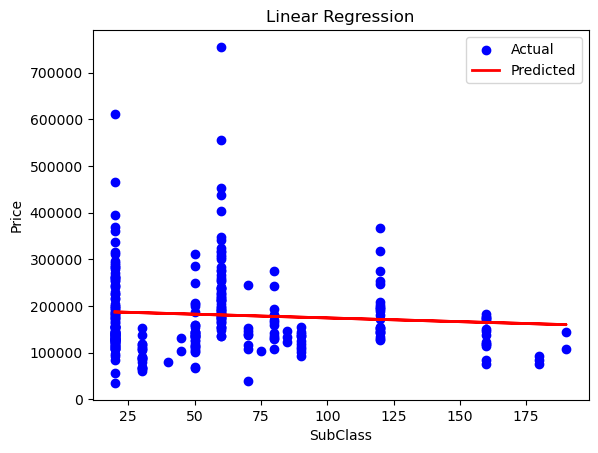

In [14]:
plt.scatter(X_test, y_test, color='blue', label='Actual')
plt.plot(X_test, y_pred, color='red', linewidth = 2, label = 'Predicted')
plt.xlabel('SubClass')
plt.ylabel('Price')
plt.title('Linear Regression')
plt.legend()
plt.show()